# Intro to Pandas and Matplotlib

Pandas is a powerful Python library used for data manipulation and analysis. It provides easy-to-use data structures, like DataFrames, to handle structured data efficiently. Pandas is commonly used when working with tabular data, allowing for tasks such as data cleaning, transformation, and exploration.

The dataset we will be using contains information about various board games, sourced from the popular BoardGameGeek platform. It includes details such as game names, year of publication, player counts, playtime, age recommendations, ratings, and complexity. Additional columns provide insights into game mechanics and categories, making this dataset great for exploring board game trends, ratings, and characteristics. Throughout the tutorial, we'll use this dataset to practice data manipulation and visualization techniques with pandas and matplotlib.

<p align="center">
  <img src="pandas board games.jpg" style="width:350px;"/>
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading and inspecting data

The main data structure in Pandas is a `DataFrame`: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

After loading data from a CSV file, it's important to inspect it before proceeding with further analysis. This involves checking the first few rows, data types, missing values, and general statistics to ensure the data is in the expected format. Functions like `head()`, `info()`, and `describe()` provide quick summaries of the dataset.

In [2]:
# sometimes we need to know the encoding of a file
import chardet

def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

get_encoding('BGG_Data_Set.csv')

'Windows-1252'

In [3]:
df = pd.read_csv('BGG_Data_Set.csv', encoding='Windows-1252')
df

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,16398.0,War,0.0,2,2,30,4,1340,2.28,20340,1.00,427.0,NaN,Children's Games
20339,7316.0,Bingo,1530.0,2,99,60,5,2154,2.85,20341,1.05,1533.0,"Betting and Bluffing, Bingo, Pattern Recognition",Party Games
20340,5048.0,Candy Land,1949.0,2,4,30,3,4006,3.18,20342,1.08,5788.0,Roll / Spin and Move,Children's Games
20341,5432.0,Chutes and Ladders,-200.0,2,6,30,3,3783,2.86,20343,1.02,4400.0,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


In [4]:
print("First 5 rows of the dataset:")
display(df.head(5))
print("\nSummary of the DataFrame:")
df.info()
print("\nSummary statistics:")
display(df.describe())

First 5 rows of the dataset:


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"



Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB

Summary statistic

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.000000,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.403227,10172.890429,1.991188,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.935911,5872.831597,0.848903,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,11029.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.500000,1.330000,146.000000
50%,88931.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.970000,309.000000
75%,192939.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


In [5]:
# N unique values in each column
display(df.nunique())

# Value counts in Min Players
display(df['Min Players'].value_counts())

ID                    20327
Name                  19974
Year Published          188
Min Players              11
Max Players              54
Play Time               116
Min Age                  21
Users Rated            2973
Rating Average          622
BGG Rank              20343
Complexity Average      379
Owned Users            3997
Mechanics              7381
Domains                  39
dtype: int64

Min Players
2     14076
1      3270
3      2365
4       474
5        57
0        46
6        21
8        17
7        14
10        2
9         1
Name: count, dtype: int64

## Selecting Columns, Rows and Filtering

Selecting columns and rows is fundamental in pandas for accessing specific data points. You can select columns by their names, and filter rows by index or condition. This helps us isolate features like game names or ratings, or to extract subsets of the data for analysis.

Filtering is useful when you want to focus on rows that meet certain conditions, like games released after a particular year or those with a specific number of players.

In [6]:
# Select a single column
display(df['Name'])

# Select multiple columns
display(df[['Name', 'Rating Average', 'Owned Users']].head())

# Select rows by position (e.g., every 10th row)
df.iloc[::10]

0                               Gloomhaven
1                Pandemic Legacy: Season 1
2                        Brass: Birmingham
3                        Terraforming Mars
4        Twilight Imperium: Fourth Edition
                       ...                
20338                                  War
20339                                Bingo
20340                           Candy Land
20341                   Chutes and Ladders
20342                          Tic-Tac-Toe
Name: Name, Length: 20343, dtype: object

,Name,Rating Average,Owned Users
0,Gloomhaven,8.79,68323.0
1,Pandemic Legacy: Season 1,8.61,65294.0
2,Brass: Birmingham,8.66,28785.0
3,Terraforming Mars,8.43,87099.0
4,Twilight Imperium: Fourth Edition,8.70,16831.0


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
10,193738.0,Great Western Trail,2016.0,2,4,150,12,29457,8.30,11,3.71,35804.0,"Deck Bag and Pool Building, Hand Management, O...",Strategy Games
20,177736.0,A Feast for Odin,2016.0,1,4,120,12,17377,8.20,21,3.84,22794.0,"Automatic Resource Growth, Dice Rolling, Grid ...",Strategy Games
30,31260.0,Agricola,2007.0,1,5,150,12,63498,7.94,31,3.64,75679.0,"Advantage Token, Automatic Resource Growth, Ca...",Strategy Games
40,284083.0,The Crew: The Quest for Planet Nine,2019.0,2,5,20,10,15027,8.02,41,1.99,31356.0,"Communication Limits, Cooperative Game, Hand M...","Family Games, Strategy Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20300,4792.0,Tiddledy Winks,1888.0,1,6,10,4,611,3.95,20302,1.10,734.0,NaN,Children's Games
20310,7262.0,Top Trumps,1968.0,2,6,20,6,957,4.22,20312,1.05,2413.0,"Memory, Rock-Paper-Scissors, Trick-taking","Children's Games, Family Games"
20320,5894.0,Twister,1966.0,2,4,10,6,3948,4.54,20322,1.08,6693.0,Player Elimination,Party Games
20330,10799.0,Old Maid,1874.0,2,6,5,4,1405,3.62,20332,1.05,2021.0,"Hand Management, Hot Potato, Set Collection",Children's Games


In [7]:
# Filter games released in 2019 or later
recent_games = df.loc[df['Year Published'] >= 2019]
display(recent_games[['Name', 'Year Published']])

# Filter rows by condition (e.g., games with a rating above 8.5 and a playtime of 60 minutes or less)
high_rated_games = df.loc[(df['Rating Average'] > 8.5) & (df['Play Time'] <= 60) & (df['Owned Users'] > 1000)]
high_rated_games[['Name', 'Rating Average', 'Owned Users']]

,Name,Year Published
5,Gloomhaven: Jaws of the Lion,2020.0
19,Wingspan,2019.0
36,Maracaibo,2019.0
40,The Crew: The Quest for Planet Nine,2019.0
50,Marvel Champions: The Card Game,2019.0
...,...,...
19474,The Umbrella Academy Game,2020.0
19546,Onimaru,2020.0
19785,Kingsburg: The Dice Game,2019.0
20007,Ms. Monopoly,2019.0


,Name,Rating Average,Owned Users
1,Pandemic Legacy: Season 1,8.61,65294.0
327,Pandemic Legacy: Season 0,8.80,5197.0
421,Aeon's End: The New Age,8.75,3962.0
1352,Middara: Unintentional Malum - Act 1,8.69,1667.0
1771,Dice Throne: Season One ReRolled,8.57,1958.0
2145,Aeon's End: Outcasts,8.88,1624.0


## Handling Missing Data

Missing data can occur in many datasets and must be addressed before analysis. You can detect missing values using `isna()`, remove them using `dropna()`, or fill them with appropriate values using `fillna()`.

In [8]:
# Check for missing values in the dataset
df.isna().sum()

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

In [9]:
df_cleaned_rows = df.dropna(axis=0)
print(f"Shape of dataset after dropping rows with missing values: {df_cleaned_rows.shape}")

df_cleaned_cols = df.dropna(axis=1)
print(f"Shape of dataset after dropping columns missing values: {df_cleaned_cols.shape}")

Shape of dataset after dropping rows with missing values: (9709, 14)
Shape of dataset after dropping columns missing values: (20343, 9)


In [10]:
# Fill missing values (e.g., fill missing 'Min Age' with the median age)
median_min_age = df['Min Age'].median()
df['Min Age'] = df['Min Age'].fillna(median_min_age)

## Data Aggregation and Grouping

Grouping data allows you to split the dataset into subsets based on specific columns (like year or player count) and perform aggregate operations (like mean, sum, min/max or count) on them. This is useful for understanding trends or patterns, such as average game ratings by year or the number of games with a specific complexity.

In [11]:
# Group by 'Year Published' and calculate the average rating
avg_rating_by_year = df.groupby('Year Published')['Rating Average'].mean()
avg_rating_by_year

Year Published
-3500.0    5.820000
-3000.0    5.615000
-2600.0    5.900000
-2200.0    7.640000
-1400.0    4.835000
             ...   
 2018.0    6.910215
 2019.0    7.087672
 2020.0    7.470146
 2021.0    7.902292
 2022.0    8.270000
Name: Rating Average, Length: 188, dtype: float64

In [12]:
# Group by Year Published and Min Players, and calculate the average complexity
avg_complexity_by_players = df.groupby(['Year Published', 'Min Players'])['Complexity Average'].mean()
avg_complexity_by_players

Year Published  Min Players
-3500.0         2              1.480000
-3000.0         1              1.100000
                2              2.020000
-2600.0         2              1.310000
-2200.0         2              4.000000
                                 ...   
 2021.0         2              2.238049
                3              3.000000
                4              3.430000
                5              1.330000
 2022.0         1              2.000000
Name: Complexity Average, Length: 480, dtype: float64

In [13]:
# Group by 'Year Published' and get multiple aggregates (e.g., mean and count)
print("\nAggregating by year of publication (mean rating and count of games):")
yearly_stats = df.groupby('Year Published').agg({
    'Rating Average': 'mean',
    'Users Rated': 'sum',
    'ID': 'count'
})
yearly_stats


Aggregating by year of publication (mean rating and count of games):


,Rating Average,Users Rated,ID
Year Published,,,
-3500.0,5.820000,664,1
-3000.0,5.615000,12153,2
-2600.0,5.900000,549,1
-2200.0,7.640000,14843,1
-1400.0,4.835000,1370,2
...,...,...,...
2018.0,6.910215,836431,1253
2019.0,7.087672,611904,1134
2020.0,7.470146,188344,683


# Sorting

Sorting and ranking data is important when you want to identify the best or worst entries in your dataset, such as the top-rated games or the most complex ones, or when you are interested in the order of entries by time. Sorting arranges data in ascending or descending order, while ranking assigns a relative position based on a particular metric.

In [14]:
games_sorted_y = df.sort_values(by='Year Published', ascending=False)
display(games_sorted_y[['Name', 'Year Published']])

# Sort games by 'Rating Average' in descending order (highest-rated games first, ignoring games with fewer than 1000 ratings)
most_owned_games = df.loc[df['Users Rated'] > 1000].sort_values(by='Rating Average', ascending=False)
most_owned_games[['Name', 'Rating Average', 'Users Rated']]

,Name,Year Published
8978,The 7th Citadel,2022.0
4122,Oath: Chronicles of Empire and Exile,2021.0
8756,Jekyll vs. Hyde,2021.0
14389,Wild Life: The Card Game,2021.0
10246,Star Trek: Alliance - Dominion War Campaign,2021.0
...,...,...
8924,The Royal Game of Ur,-2600.0
20219,Marbles,-3000.0
1275,Backgammon,-3000.0
8174,Senet,-3500.0


,Name,Rating Average,Users Rated
5,Gloomhaven: Jaws of the Lion,8.87,8392
136,Eclipse: Second Dawn for the Galaxy,8.80,2556
327,Pandemic Legacy: Season 0,8.80,1536
52,Clank! Legacy: Acquisitions Incorporated,8.79,3295
0,Gloomhaven,8.79,42055
...,...,...,...
20340,Candy Land,3.18,4006
20341,Chutes and Ladders,2.86,3783
20339,Bingo,2.85,2154
20342,Tic-Tac-Toe,2.68,3275


In [15]:
# Sort games by 'Complexity Average' and 'Play Time' (for the most complex and shortest games)
complex_long_games = df.sort_values(by=['Complexity Average', 'Play Time'], ascending=[False, True])
complex_long_games[['Name', 'Complexity Average', 'Play Time']].head(8)

,Name,Complexity Average,Play Time
16581,Empire (Third Edition),5.00,180
6910,Triumph of Chaos v.2 (Deluxe Edition),4.93,600
9733,Patton in Flames,4.91,120
6419,La Grande Guerre 14-18,4.91,3600
4886,Europa Universalis,4.90,3600
12147,D-Day at Iwo Jima,4.89,360
7895,Atlantic Wall: D-Day to Falaise,4.89,14400
7361,Star Fleet Battles Silver Anniversary Master R...,4.86,0


In [16]:
# Rank games by 'Rating Average' (dense, min)
df['Rank'] = df['Rating Average'].rank(ascending=False, method='dense')
df.sort_values(by='Rank')[['Name', 'Rating Average', 'Rank']].reset_index().head(15)

,index,Name,Rating Average,Rank
0,14596,Erune,9.58,1.0
1,11687,DEFCON 1,9.54,2.0
2,10246,Star Trek: Alliance - Dominion War Campaign,9.46,3.0
3,13547,Aeolis,9.43,4.0
4,16310,TerroriXico,9.43,4.0
5,11480,Company of Heroes,9.34,5.0
6,7191,Wings of the Motherland,9.31,6.0
7,12244,Deliverance,9.25,7.0
8,9940,Human Punishment: The Beginning,9.24,8.0
9,15784,War Titans: Invaders Must Die!,9.24,8.0


## Data Visualization with Matplotlib

Matplotlib is a widely-used Python library for creating static, animated, and interactive visualizations. It provides a flexible and powerful framework for plotting a variety of charts such as line plots, bar plots, histograms, scatter plots, and more. With Matplotlib, you can customize every aspect of a plot, from colors and labels to grids and legends, making it a valuable tool for communicating data insights clearly and effectively. 

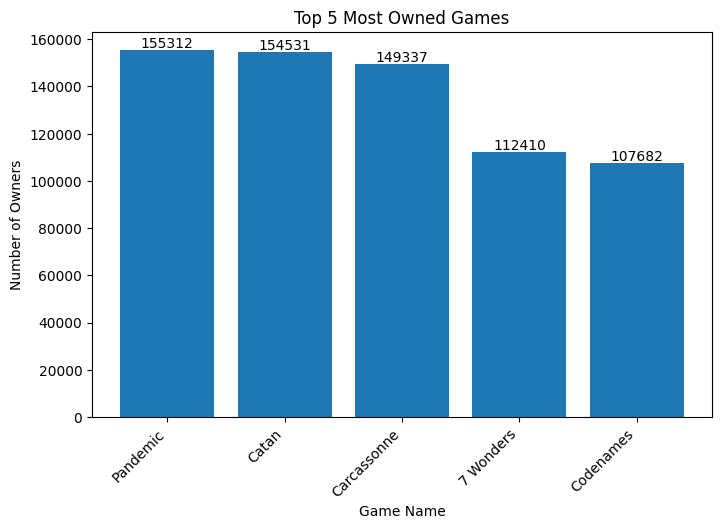

In [17]:
n = 5

most_owned_games = df.sort_values(by='Owned Users', ascending=False).head(n)

plt.figure(figsize=(8, 5))
plt.bar(most_owned_games['Name'], most_owned_games['Owned Users']) # you can also try barh for horizontal bar plots

# add text on top of each bar
for i, n_owners in enumerate(most_owned_games['Owned Users']):
    plt.text(i, n_owners + 1000, f'{int(n_owners)}', ha='center')

plt.xlabel('Game Name')
plt.ylabel('Number of Owners')
plt.title(f'Top {n} Most Owned Games')
plt.xticks(rotation=45, ha='right')
plt.show()

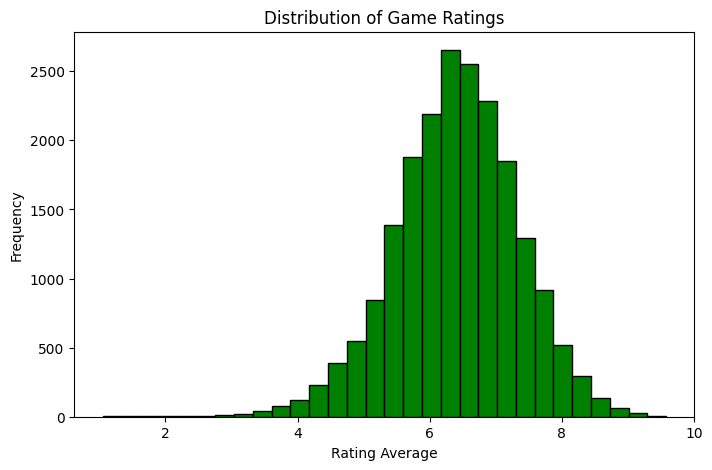

In [18]:
# Histogram: Distribution of game ratings, include kde
plt.figure(figsize=(8, 5))
plt.hist(df['Rating Average'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating Average')
plt.ylabel('Frequency')
plt.show()

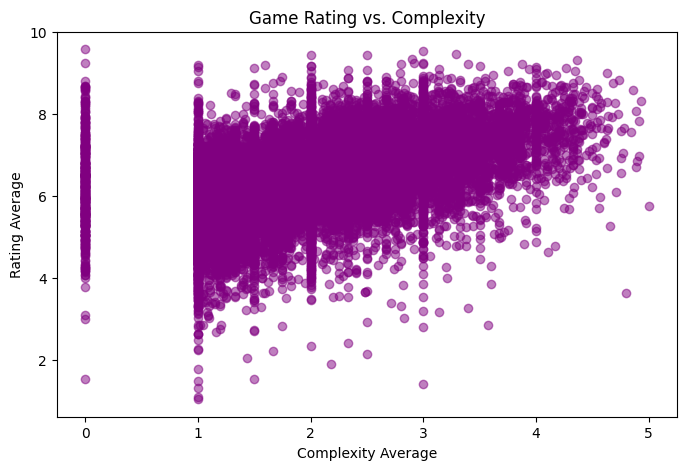

In [19]:
# Scatter plot: Rating vs. Complexity
plt.figure(figsize=(8, 5))
plt.scatter(df['Complexity Average'], df['Rating Average'], alpha=0.5, color='purple')
plt.title('Game Rating vs. Complexity')
plt.xlabel('Complexity Average')
plt.ylabel('Rating Average')
plt.show()

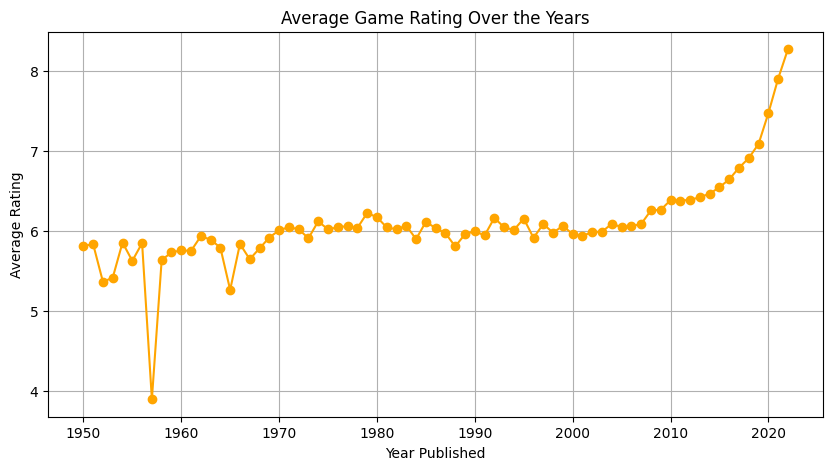

In [20]:
# Line plot: Average rating per year
avg_rating_per_year = df.groupby('Year Published')['Rating Average'].mean()
# filter from year 1950 onwards
avg_rating_per_year = avg_rating_per_year[avg_rating_per_year.index >= 1950]
plt.figure(figsize=(10, 5))
plt.plot(avg_rating_per_year.index, avg_rating_per_year.values, marker='o', linestyle='-', color='orange')
plt.title('Average Game Rating Over the Years')
plt.xlabel('Year Published')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

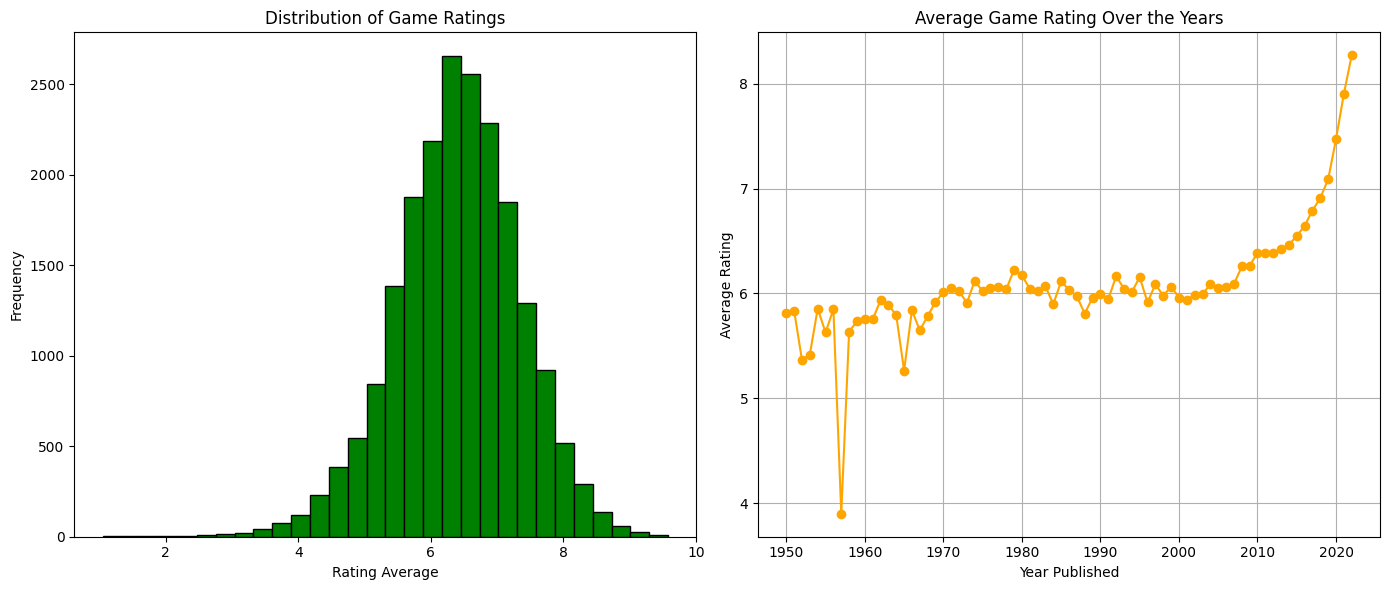

In [21]:
# Creating subplots: A 1x2 grid for two different charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram on the first subplot
axes[0].hist(df['Rating Average'].dropna(), bins=30, color='green', edgecolor='black')
axes[0].set_title('Distribution of Game Ratings')
axes[0].set_xlabel('Rating Average')
axes[0].set_ylabel('Frequency')

# Line plot on the second subplot
axes[1].plot(avg_rating_per_year.index, avg_rating_per_year.values, marker='o', linestyle='-', color='orange')
axes[1].set_title('Average Game Rating Over the Years')
axes[1].set_xlabel('Year Published')
axes[1].set_ylabel('Average Rating')
axes[1].grid(True)

plt.tight_layout()

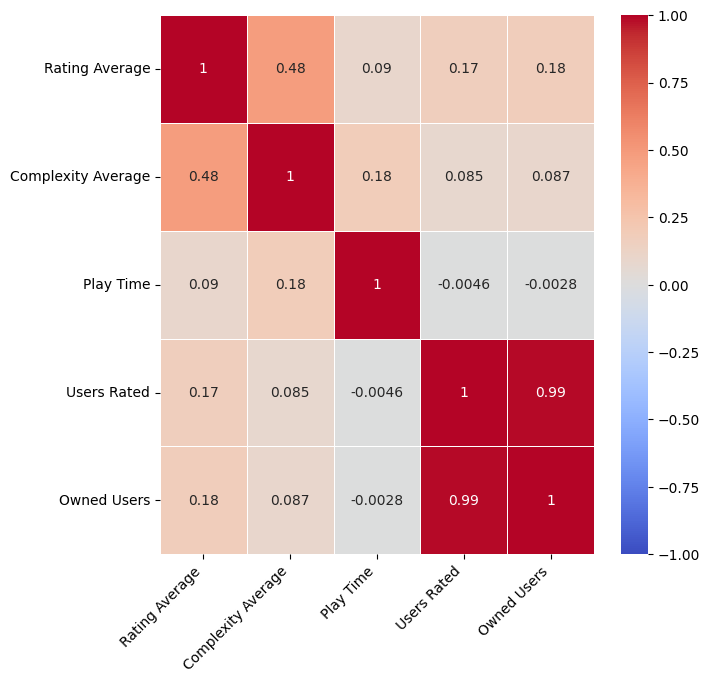

In [22]:
import seaborn as sns

correlation_matrix = df[['Rating Average', 'Complexity Average', 'Play Time', 'Users Rated', 'Owned Users']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
# Export the cleaned dataset to a new CSV file
output_csv_path = 'cleaned_board_games.csv'
df_cleaned_rows.to_csv(output_csv_path, index=False)
print(f"Data exported to {output_csv_path}")

Data exported to cleaned_board_games.csv


## Extra: advanced pandas tricks

Let's say we are interested in finding which type of games are the highest rated on average.
The Domains column provides information on that, but it contains a string of game types, separated by a comma.

In [24]:
display(df[["Name", "Domains"]])

domain_df = df.dropna(subset=['Domains'])
domain_df.loc[:, 'Domains'] = domain_df['Domains'].str.split(', ')

domain_df[['Name', 'Domains']]

,Name,Domains
0,Gloomhaven,"Strategy Games, Thematic Games"
1,Pandemic Legacy: Season 1,"Strategy Games, Thematic Games"
2,Brass: Birmingham,Strategy Games
3,Terraforming Mars,Strategy Games
4,Twilight Imperium: Fourth Edition,"Strategy Games, Thematic Games"
...,...,...
20338,War,Children's Games
20339,Bingo,Party Games
20340,Candy Land,Children's Games
20341,Chutes and Ladders,Children's Games


,Name,Domains
0,Gloomhaven,"[Strategy Games, Thematic Games]"
1,Pandemic Legacy: Season 1,"[Strategy Games, Thematic Games]"
2,Brass: Birmingham,[Strategy Games]
3,Terraforming Mars,[Strategy Games]
4,Twilight Imperium: Fourth Edition,"[Strategy Games, Thematic Games]"
...,...,...
20338,War,[Children's Games]
20339,Bingo,[Party Games]
20340,Candy Land,[Children's Games]
20341,Chutes and Ladders,[Children's Games]


In [25]:
exploded_domains = domain_df.explode('Domains')
exploded_domains[['Name', 'Domains']]

,Name,Domains
0,Gloomhaven,Strategy Games
0,Gloomhaven,Thematic Games
1,Pandemic Legacy: Season 1,Strategy Games
1,Pandemic Legacy: Season 1,Thematic Games
2,Brass: Birmingham,Strategy Games
...,...,...
20339,Bingo,Party Games
20340,Candy Land,Children's Games
20341,Chutes and Ladders,Children's Games
20342,Tic-Tac-Toe,Abstract Games


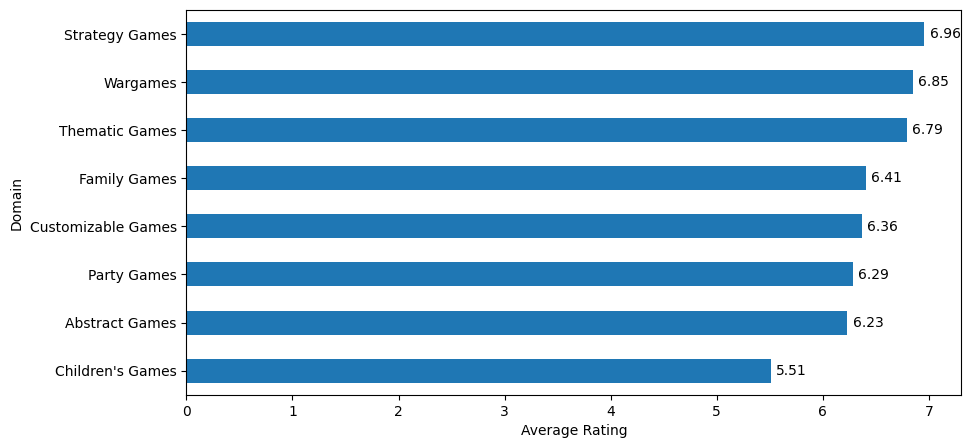

In [26]:
domain_ratings = exploded_domains.groupby('Domains')['Rating Average'].mean()
domain_ratings.sort_values().plot(kind='barh', figsize=(10, 5))

for i, rating in enumerate(domain_ratings.sort_values()):
    plt.text(rating + 0.05, i, f'{rating:.2f}', va='center')

plt.xlabel('Average Rating')
plt.ylabel('Domain')
plt.show()